In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

In [0]:
import os

#print (os.listdir('/content/gdrive/My Drive/MILIZE/'))
print (os.listdir('/content/gdrive/My Drive/MILIZE/Semantic/voc2012/'))
print (os.listdir('/content/gdrive/My Drive/MILIZE/Semantic/voc2012/voc2012/'))

### Eager Execution

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

from sklearn.model_selection import train_test_split

In [0]:
print ("TensorFlow version: {}".format(tf.VERSION))
print ("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.12.0
Eager execution: True


Data

In [0]:
# Fetch and format the mnist data
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print (mnist_images.shape)
print (mnist_labels.shape)

(60000, 28, 28)
(60000,)


In [0]:
dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels, tf.int32)))

dataset = dataset.shuffle(1000).batch(32)

print (dataset)

<BatchDataset shapes: ((?, 28, 28, 1), (?,)), types: (tf.float32, tf.int32)>


Example 1 (MNIST)

In [0]:
#mnist_model = tf.keras.Sequential([
#  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
#  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
#  tf.keras.layers.GlobalAveragePooling2D(),
#  tf.keras.layers.Dense(10)
#])

mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                          input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(10, activation='softmax')
    tf.keras.layers.Dense(10)
])

In [0]:
for images,labels in dataset.take(2):
  print (images.shape)
  print (mnist_model(images).shape)
  print ('Logits: ', mnist_model(images)[:1].numpy())

(32, 28, 28, 1)
(32, 10)
Logits:  [[-0.8845177  -2.175113    1.9420677  -2.1558092   1.1331186  -0.94650215
   5.3078327  -3.0470169   2.5471184  -0.3914078 ]]
(32, 28, 28, 1)
(32, 10)
Logits:  [[-1.5578071   1.1617892   2.40897     1.9408671   0.7835284   2.0152261
   0.16677037 -1.834617    4.693721   -3.953016  ]]


In [0]:
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

In [0]:
optimizer = tf.train.AdamOptimizer()

loss_history = []

In [0]:
for (batch, (images, labels)) in tqdm(enumerate(dataset.take(300))):
  
  with tf.GradientTape() as tape:
    logits = mnist_model(images, training=True)
    loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)

  loss_history.append(loss_value.numpy())
  grads = tape.gradient(loss_value, mnist_model.variables)
  optimizer.apply_gradients(zip(grads, mnist_model.variables),
                            global_step=tf.train.get_or_create_global_step())
  
  
  #if (batch+1) % 10 == 0:
  #  print()
  #print('.', end='')


300it [00:07, 42.43it/s]


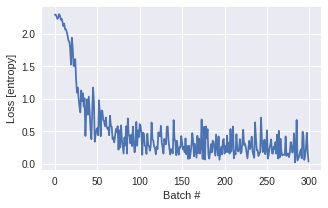

In [0]:
plt.figure(figsize=(5, 3))
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')
plt.show()

Example 2 (MINIST)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                          input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(10, activation='softmax')
    tf.keras.layers.Dense(10)
])

In [0]:
for images,labels in dataset.take(2):
  print (images.shape)
  print (model(images).shape)
  print ('Logits: ', model(images)[:1].numpy())

(32, 28, 28, 1)
(32, 10)
Logits:  [[-1.2986987   6.6163383   0.21518797 -0.1080678  -0.8680533  -2.330555
  -0.7385723  -2.1257148   0.5767906  -1.7687902 ]]
(32, 28, 28, 1)
(32, 10)
Logits:  [[ 5.4667873  -7.114881   -0.08976011  6.7406363  -4.249432    5.2671165
   1.9824954  -1.3837584   2.8716595  -1.7881808 ]]


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [0]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

 
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, model.variables)

#optimizer = tf.train.AdamOptimizer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [0]:
train_loss_results = []
train_accuracy_results = []
 
num_epochs = 3
 
for epoch in tqdm(range(num_epochs)):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
  for x, y in dataset.take(200):
    # Optimize the model
    grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.variables), 
                              global_step=tf.train.get_or_create_global_step())

    # Track progress
    epoch_loss_avg(loss(model, x, y))  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if (epoch+1) % 1 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch+1, 
                                                                epoch_loss_avg.result(), 
                                                                epoch_accuracy.result()))

 33%|███▎      | 1/3 [00:05<00:11,  5.96s/it]

Epoch 001: Loss: 2.289, Accuracy: 15.328%


 67%|██████▋   | 2/3 [00:11<00:05,  5.91s/it]

Epoch 002: Loss: 2.068, Accuracy: 39.000%


100%|██████████| 3/3 [00:17<00:00,  5.86s/it]

Epoch 003: Loss: 0.486, Accuracy: 86.547%


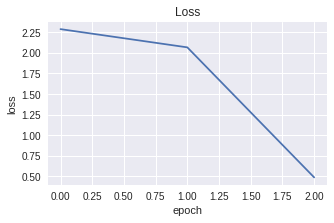

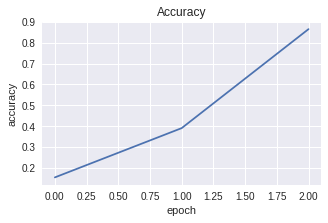

In [0]:
plt.figure(figsize =(5,3))
plt.plot(train_loss_results)
plt.title('Loss')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.legend(loc='best')
plt.show()

plt.figure(figsize =(5,3))
plt.plot(train_accuracy_results)
#plt.plot(history.history['val_acc'], marker='.', label='validation')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
#plt.legend(loc='best')
plt.show()

Exapmle 3 (MINIST)

In [0]:
train_x, valid_x, train_y, valid_y = train_test_split(mnist_images, mnist_labels, 
                                                     test_size=0.3,
                                                     random_state=100)

In [0]:
train_x = np.expand_dims(train_x, axis=-1) / 255.0
valid_x = np.expand_dims(valid_x, axis=-1) / 255.0

In [0]:
print (train_x.shape)
print (train_y.shape)
print (valid_x.shape)
print (valid_y.shape)

(42000, 28, 28, 1)
(42000,)
(18000, 28, 28, 1)
(18000,)


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                          input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
__________

In [0]:
train_x_tf = tf.convert_to_tensor(train_x, dtype=tf.float32)
train_y_tf = tf.convert_to_tensor(train_y, dtype=tf.int32)
valid_x_tf = tf.convert_to_tensor(valid_x, dtype=tf.float32)
valid_y_tf = tf.convert_to_tensor(valid_y, dtype=tf.int32)

In [0]:
print (train_x_tf.shape)
print (train_y_tf.shape)

(42000, 28, 28, 1)
(42000,)


In [0]:
def loss(model, x, y):
  y_pre = model(x)
  y_oh = tf.one_hot(y, depth=10, dtype=tf.float32)
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits=y_pre))
  return cross_entropy
 
def grad(model, x, y):
  with tf.GradientTape() as tape:
    loss_value = loss(model, x, y)
  return tape.gradient(loss_value, model.variables)

In [0]:
epoch_num = 3
batch_size = 32
 
optimizer = tf.train.AdamOptimizer()
 
#for epoch in tqdm(range(epoch_num), file=sys.stdout):
for epoch in tqdm(range(epoch_num)):
    
    n, _, _, _ = train_x_tf.shape
    n = n.value
    perm = np.random.permutation(n)
    
    for i in range(0, n, batch_size):
 
        batch_x = tf.gather(train_x_tf, perm[i:i+batch_size])
        batch_y = tf.gather(train_y_tf, perm[i:i+batch_size])
 
        grads = grad(model, batch_x, batch_y)
        optimizer.apply_gradients(zip(grads, model.variables), 
                                  global_step=tf.train.get_or_create_global_step())
 
    train_loss = loss(model, train_x_tf, train_y_tf)
    correct_prediction = tf.equal(tf.argmax(model(train_x_tf), axis=1, output_type=tf.int32), 
                                  train_y_tf)
    train_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    valid_loss = loss(model, valid_x_tf, valid_y_tf)
    correct_prediction = tf.equal(tf.argmax(model(valid_x_tf), axis=1, output_type=tf.int32), 
                                  valid_y_tf)
    valid_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
    if (epoch+1)%1 == 0:
        tqdm.write('epoch:\t{}\ttrain/loss:\t{:.5f}\tvalid/loss:\t{:.5f}\ttrain/accuracy:\t{:.5f}\tvalid/accuracy:\t{:.5f}'.format(
            epoch, train_loss, valid_loss, train_acc, valid_acc)
                  )

 33%|███▎      | 1/3 [00:56<01:53, 56.52s/it]

epoch:	1	train/loss:	0.05493	valid/loss:	0.06653	train/accuracy:	0.98410	valid/accuracy:	0.97928


 67%|██████▋   | 2/3 [01:48<00:55, 55.21s/it]

epoch:	2	train/loss:	0.03473	valid/loss:	0.05170	train/accuracy:	0.98902	valid/accuracy:	0.98289


100%|██████████| 3/3 [02:40<00:00, 54.25s/it]

epoch:	3	train/loss:	0.02596	valid/loss:	0.04784	train/accuracy:	0.99174	valid/accuracy:	0.98544


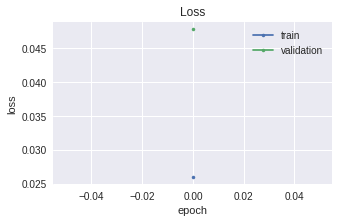

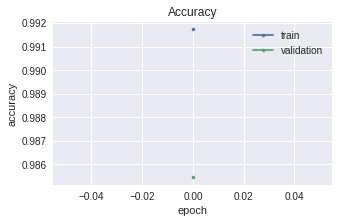

In [0]:
plt.figure(figsize =(5,3))
plt.plot(train_loss, marker='.', label='train')
plt.plot(valid_loss, marker='.', label='validation')
plt.title('Loss')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

plt.figure(figsize =(5,3))
plt.plot(train_acc, marker='.', label='train')
plt.plot(valid_acc, marker='.', label='validation')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

Example 4 (MINST)

In [0]:
x_train = np.reshape(mnist_images, (-1, 28*28)) / 255.0

print (mnist_images.shape)
print (mnist_labels.shape)
print (x_train.shape)

(60000, 28, 28)
(60000,)
(60000, 784)


In [0]:
train_x, valid_x, train_y, valid_y = train_test_split(x_train, mnist_labels, 
                                                     test_size=0.3,
                                                     random_state=100)

In [0]:
print (train_x.shape)
print (train_y.shape)
print (valid_x.shape)
print (valid_y.shape)

(42000, 784)
(42000,)
(18000, 784)
(18000,)


In [0]:
train_x_tf = tf.convert_to_tensor(train_x, dtype=tf.float32)
train_y_tf = tf.convert_to_tensor(train_y, dtype=tf.int32)
valid_x_tf = tf.convert_to_tensor(valid_x, dtype=tf.float32)
valid_y_tf = tf.convert_to_tensor(valid_y, dtype=tf.int32)

In [0]:
def loss(model, x, y):
  y_pre = model(x)
  y_oh = tf.one_hot(y, depth=10, dtype=tf.float32)
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits=y_pre))
  return cross_entropy
 
def grad(model, x, y):
  with tf.GradientTape() as tape:
    loss_value = loss(model, x, y)
  return tape.gradient(loss_value, model.variables)

In [0]:
class Model():
    
    def __init__(self):
        input_size = 784
        output_size = 10
        hidden_size = 20
        self.fc1_w = tfe.Variable(tf.truncated_normal([input_size, hidden_size], stddev=0.1), dtype=tf.float32)
        self.fc1_b = tfe.Variable(tf.constant(0.1, shape=[hidden_size]), dtype=tf.float32)
        self.fc2_w = tfe.Variable(tf.truncated_normal([hidden_size, hidden_size], stddev=0.1), dtype=tf.float32)
        self.fc2_b = tfe.Variable(tf.constant(0.1, shape=[hidden_size]), dtype=tf.float32)
        self.fc3_w = tfe.Variable(tf.truncated_normal([hidden_size, output_size], stddev=0.1), dtype=tf.float32)
        self.fc3_b = tfe.Variable(tf.constant(0.1, shape=[output_size]), dtype=tf.float32)
        self.variables = [
            self.fc1_w, self.fc1_b,
            self.fc2_w, self.fc2_b,
            self.fc3_w, self.fc3_b
        ]
        
    def __call__(self, x):
        h = tf.nn.relu(tf.matmul(x, self.fc1_w) + self.fc1_b)
        h = tf.nn.relu(tf.matmul(h, self.fc2_w) + self.fc2_b)
        y_pre = tf.matmul(h, self.fc3_w) + self.fc3_b
        return y_pre
    
model = Model()

In [0]:
def loss(model, x, y):
  y_pre = model(x)
  y_oh = tf.one_hot(y, depth=10, dtype=tf.float32)
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits=y_pre))
  return cross_entropy
 
def grad(model, x, y):
  with tf.GradientTape() as tape:
    loss_value = loss(model, x, y)
  return tape.gradient(loss_value, model.variables)

In [0]:
epoch_num = 3
batch_size = 32
 
optimizer = tf.train.AdamOptimizer()
 
#for epoch in tqdm(range(epoch_num), file=sys.stdout):
for epoch in tqdm(range(epoch_num)):
    
    n, _ = train_x_tf.shape
    n = n.value
    perm = np.random.permutation(n)
    
    for i in range(0, n, batch_size):
 
        batch_x = tf.gather(train_x_tf, perm[i:i+batch_size])
        batch_y = tf.gather(train_y_tf, perm[i:i+batch_size])
 
        grads = grad(model, batch_x, batch_y)
        optimizer.apply_gradients(zip(grads, model.variables), 
                                  global_step=tf.train.get_or_create_global_step())
 
    train_loss = loss(model, train_x_tf, train_y_tf)
    correct_prediction = tf.equal(tf.argmax(model(train_x_tf), axis=1, output_type=tf.int32), 
                                  train_y_tf)
    train_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    valid_loss = loss(model, valid_x_tf, valid_y_tf)
    correct_prediction = tf.equal(tf.argmax(model(valid_x_tf), axis=1, output_type=tf.int32), 
                                  valid_y_tf)
    valid_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
    if (epoch+1)%1 == 0:
        tqdm.write('epoch:\t{}\ttrain/loss:\t{:.5f}\tvalid/loss:\t{:.5f}\ttrain/accuracy:\t{:.5f}\tvalid/accuracy:\t{:.5f}'.format(
            epoch, train_loss, valid_loss, train_acc, valid_acc)
                  )

 33%|███▎      | 1/3 [00:38<01:16, 38.19s/it]

epoch:	0	train/loss:	0.33671	valid/loss:	0.37090	train/accuracy:	0.89933	valid/accuracy:	0.89189


 67%|██████▋   | 2/3 [01:16<00:38, 38.09s/it]

epoch:	1	train/loss:	0.23066	valid/loss:	0.26773	train/accuracy:	0.93017	valid/accuracy:	0.92100


100%|██████████| 3/3 [01:53<00:00, 38.04s/it]

epoch:	2	train/loss:	0.18009	valid/loss:	0.22618	train/accuracy:	0.94590	valid/accuracy:	0.93472


Example 5 (Cifar10)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

from sklearn.model_selection import train_test_split

In [2]:
# cifar10 data
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print ()
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# for cifar10
#y_train = np.squeeze(y_train)
#y_test = np.squeeze(y_test)

# for minist
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [0]:
n_classes = 10

x_train = x_train.astype(np.float)/255.0
y_train_oh = np.identity(n_classes)[y_train]

In [5]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train_oh, 
                                                       test_size=0.20, 
                                                       stratify=y_train,
                                                       random_state=100)

print (x_train.shape)
print (y_train.shape)
print (x_valid.shape)
print (y_valid.shape)

(48000, 28, 28, 1)
(48000, 10)
(12000, 28, 28, 1)
(12000, 10)


In [0]:
perm_train = np.random.permutation(len(x_train))
selected_train = perm_train[:1000]

perm_valid = np.random.permutation(len(x_valid))
selected_valid = perm_valid[:500]

x_train = x_train[selected_train, :, :, :]
y_train = y_train[selected_train, :]
x_valid = x_valid[selected_valid, :, :, :]
y_valid = y_valid[selected_valid, :]

In [7]:
print (x_train.shape)
print (y_train.shape)
print (x_valid.shape)
print (y_valid.shape)

(1000, 28, 28, 1)
(1000, 10)
(500, 28, 28, 1)
(500, 10)


In [0]:
x_train_tf = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
x_valid_tf = tf.convert_to_tensor(x_valid, dtype=tf.float32)
y_valid_tf = tf.convert_to_tensor(y_valid, dtype=tf.float32)

In [9]:
print (x_train_tf.shape)
print (y_train_tf.shape)
print (x_valid_tf.shape)
print (y_valid_tf.shape)

(1000, 28, 28, 1)
(1000, 10)
(500, 28, 28, 1)
(500, 10)


Model 1

In [0]:
#input_shape = x_train_tf.shape[1:]

#model = tf.keras.Sequential([
#    tf.keras.layers.InputLayer(input_shape=input_shape),
#    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
#    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
#    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
#    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
#    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
#    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(64, activation='relu'),
#    tf.keras.layers.Dropout(0.3),
#    tf.keras.layers.Dense(10, activation='softmax')
#])

Model 2

In [0]:
input_shape = x_train_tf.shape[1:]

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.GaussianNoise(0.15),
    
    tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
    tf.keras.layers.LeakyReLU(0.1),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
    tf.keras.layers.LeakyReLU(0.1),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
    tf.keras.layers.LeakyReLU(0.1),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(256, (3, 3), padding='same'),
    tf.keras.layers.LeakyReLU(0.1),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same'),
    tf.keras.layers.LeakyReLU(0.1),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same'),
    tf.keras.layers.LeakyReLU(0.1),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(512, (3, 3), padding='valid'),
    tf.keras.layers.LeakyReLU(0.1),
    tf.keras.layers.Conv2D(256, (1, 1), padding='same'),
    tf.keras.layers.LeakyReLU(0.1),
    tf.keras.layers.Conv2D(128, (1, 1), padding='same'),
    tf.keras.layers.LeakyReLU(0.1),
        
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(n_classes, activation='softmax'),
    #tf.keras.layers.Dense(n_classes),
])

Model 3

In [0]:
class Model3(tf.keras.Model):
  def __init__(self):
    super(Model3, self).__init__()
    self.gaussian_noise = tf.keras.layers.GaussianNoise(0.15)
    
    self.conv1a = tf.keras.layers.Conv2D(128, (3, 3), padding='same')
    self.activation1a = tf.keras.layers.LeakyReLU(0.1)
    self.conv1b = tf.keras.layers.Conv2D(128, (3, 3), padding='same')
    self.activation1b = tf.keras.layers.LeakyReLU(0.1)
    self.conv1c = tf.keras.layers.Conv2D(128, (3, 3), padding='same')
    self.activation1c = tf.keras.layers.LeakyReLU(0.1)
    self.maxpool1 = tf.keras.layers.MaxPool2D((2, 2), padding='same')
    self.dropout1 = tf.keras.layers.Dropout(0.5)
    
    self.conv2a = tf.keras.layers.Conv2D(256, (3, 3), padding='same')
    self.activation2a = tf.keras.layers.LeakyReLU(0.1)
    self.conv2b = tf.keras.layers.Conv2D(256, (3, 3), padding='same')
    self.activation2b = tf.keras.layers.LeakyReLU(0.1)
    self.conv2c = tf.keras.layers.Conv2D(256, (3, 3), padding='same')
    self.activation2c = tf.keras.layers.LeakyReLU(0.1)
    self.maxpool2 = tf.keras.layers.MaxPool2D((2, 2), padding='same')
    self.dropout2 = tf.keras.layers.Dropout(0.5)
    
    self.conv3a = tf.keras.layers.Conv2D(512, (3, 3), padding='valid')
    self.activation3a = tf.keras.layers.LeakyReLU(0.1)
    self.conv3b = tf.keras.layers.Conv2D(256, (1, 1), padding='same')
    self.activation3b = tf.keras.layers.LeakyReLU(0.1)
    self.conv3c = tf.keras.layers.Conv2D(128, (1, 1), padding='same')
    self.activation3c = tf.keras.layers.LeakyReLU(0.1)
        
    self.global_average = tf.keras.layers.GlobalAveragePooling2D()
    self.dense = tf.keras.layers.Dense(n_classes, activation='softmax')
  
  def call(self, x, training=True):
    
    if training:
      h = self.gaussian_noise(x)
    else:
      h = x
      
    h = self.conv1a(h)
    h = self.activation1a(h)
    h = self.conv1b(h)
    h = self.activation1b(h)
    h = self.conv1c(h)
    h = self.activation1c(h)
    h = self.maxpool1(h)
    h = self.dropout1(h)
    
    h = self.conv2a(h)
    h = self.activation2a(h)
    h = self.conv2b(h)
    h = self.activation2b(h)
    h = self.conv2c(h)
    h = self.activation2c(h)
    h = self.maxpool2(h)
    h = self.dropout2(h)
    
    h = self.conv3a(h)
    h = self.activation3a(h)
    h = self.conv3b(h)
    h = self.activation3b(h)
    h = self.conv3c(h)
    h = self.activation3c(h)
        
    h = self.global_average(h)
    h = self.dense(h)
    
    return h

In [0]:
model = Model3()

In [50]:
model(x_train_tf[:2, :, :, :])

<tf.Tensor: id=211051, shape=(2, 10), dtype=float32, numpy=
array([[0.10049925, 0.09950303, 0.10020141, 0.09988433, 0.10047012,
        0.1004041 , 0.10003187, 0.10028838, 0.09954456, 0.09917299],
       [0.10064647, 0.09935667, 0.10026975, 0.09983055, 0.10052487,
        0.10054764, 0.10007967, 0.1003909 , 0.09945353, 0.09889992]],
      dtype=float32)>

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_9 (GaussianNo multiple                  0         
_________________________________________________________________
conv2d_81 (Conv2D)           multiple                  1280      
_________________________________________________________________
leaky_re_lu_81 (LeakyReLU)   multiple                  0         
_________________________________________________________________
conv2d_82 (Conv2D)           multiple                  147584    
_________________________________________________________________
leaky_re_lu_82 (LeakyReLU)   multiple                  0         
_________________________________________________________________
conv2d_83 (Conv2D)           multiple                  147584    
_________________________________________________________________
leaky_re_lu_83 (LeakyReLU)   multiple                  0         
__________

In [47]:
print (len(model.variables))
print (len(model.variables[0].numpy()))
print (len(model.variables[0][0].numpy()))
print (np.sum(model.variables[0].numpy()))

20
3
3
-0.092083454


In [0]:
def loss(model, x, y):
  y_pred = model(x)
  cross_entropy = - tf.reduce_mean(tf.reduce_sum(y * tf.log(tf.clip_by_value(y_pred, 1e-10, 1.0)), 
                                                 axis = 1))
  #cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, 
  #                                                                          logits=y_pred))
  return cross_entropy
 
def grad(model, x, y):
  with tf.GradientTape() as tape:
    loss_value = loss(model, x, y)
  return tape.gradient(loss_value, model.variables)

def accuracy(y_true, y_pred):
  correct_preds = tf.equal(tf.argmax(y_true, axis = 1), 
                           tf.argmax(y_pred, axis = 1))
  accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
  return accuracy

In [71]:
epochs = 3
batch_size = 32

max_learning_rate = 0.001
initial_beta1 = 0.9
final_beta1 = 0.5

learning_rate = tfe.Variable(0.001)
beta_1 = tfe.Variable(initial_beta1)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
 
history_train_loss = []
history_valid_loss = []
history_train_acc = []
history_valid_acc = []
  
for epoch in tqdm(range(epochs)):
  
  if epoch > 1:
    learning_rate.assign(0.001)  
  
  #n, _, _, _ = x_train_tf.shape
  #n = n.value
  n = tf.shape(x_train_tf).numpy()[0]  
  perm = np.random.permutation(n)
  
  for i in range(0, n, batch_size):
    batch_x = tf.gather(x_train_tf, perm[i:i+batch_size])
    batch_y = tf.gather(y_train_tf, perm[i:i+batch_size])

    grads = grad(model, batch_x, batch_y)
    optimizer.apply_gradients(zip(grads, model.variables), 
                              global_step=tf.train.get_or_create_global_step())
    
    #batch_loss = loss(model, batch_x, batch_y)
    #batch_y_pred = model(batch_x)
    #batch_acc = accuracy(batch_y, batch_y_pred)
    
    #if (i + 1) % show_step == 0:
    #  print ('-' * 100)
    #  print ('epoch: ' + str(epoch + 1) + ' Iteration: ' + str(i + 1) + 
    #         '  Loss: ' + str(batch_loss) + '  Accuracy: ' + str(batch_acc))
  
  history_train_loss = []
  history_train_acc = []
  
  n_train = tf.shape(x_train_tf).numpy()[0]  
  perm_train = np.random.permutation(n_train)
  
  calc_size = 1000
  for i in range(0, n_train, calc_size):
    batch_x = tf.gather(x_train_tf, perm_train[i:i+calc_size])
    batch_y = tf.gather(y_train_tf, perm_train[i:i+calc_size])
    
    batch_loss = loss(model, batch_x, batch_y)
    #batch_y_pred = model(batch_x)
    batch_y_pred = model(batch_x, training=False)
    batch_acc = accuracy(batch_y, batch_y_pred)
    
    history_train_loss.append(batch_loss)
    history_train_acc.append(batch_acc)
    
  train_loss = np.mean(history_train_loss)
  train_acc = np.mean(history_train_acc)

  history_train_loss.append(train_loss)
  history_train_acc.append(train_acc)

  history_valid_loss = []
  history_valid_acc = []
  
  n_valid = tf.shape(x_valid_tf).numpy()[0]  
  perm_valid = np.random.permutation(n_valid)
  
  calc_size = 1000
  for i in range(0, n_valid, calc_size):
    batch_x = tf.gather(x_valid_tf, perm_valid[i:i+calc_size])
    batch_y = tf.gather(y_valid_tf, perm_valid[i:i+calc_size])
    
    batch_loss = loss(model, batch_x, batch_y)
    #batch_y_pred = model(batch_x)
    batch_y_pred = model(batch_x, training=False)
    batch_acc = accuracy(batch_y, batch_y_pred)
    
    history_valid_loss.append(batch_loss)
    history_valid_acc.append(batch_acc)
    
  valid_loss = np.mean(history_valid_loss)
  valid_acc = np.mean(history_valid_acc)

  history_valid_loss.append(valid_loss)
  history_valid_acc.append(valid_acc)
  
  #tqdm.write('epoch:\t{}\ttrain/loss:\t{:.5f}\tvalid/loss:\t{:.5f}\ttrain/accuracy:\t{:.5f}\tvalid/accuracy:\t{:.5f}'
  #           .format(epoch, train_loss, valid_loss, train_acc, valid_acc))
  #tqdm.write('epoch: '+str(epoch)+' loss: '+str(train_loss.numpy())+' acc: '
  #           +str(train_acc.numpy())+ ' val_loss: '+str(valid_loss.numpy())
  #           +' val_acc: '+str(valid_acc.numpy()))
  tqdm.write('epoch: '+str(epoch)+' loss: '+str(train_loss)+' acc: '
             +str(train_acc)+ ' val_loss: '+str(valid_loss)
             +' val_acc: '+str(valid_acc))
     

 33%|███▎      | 1/3 [00:04<00:08,  4.24s/it]

epoch: 0 loss: 0.111206256 acc: 0.967 val_loss: 0.30288866 val_acc: 0.92


 67%|██████▋   | 2/3 [00:08<00:04,  4.14s/it]

epoch: 1 loss: 0.08565004 acc: 0.973 val_loss: 0.39595863 val_acc: 0.894


100%|██████████| 3/3 [00:12<00:00,  4.08s/it]

epoch: 2 loss: 0.06806667 acc: 0.974 val_loss: 0.39410624 val_acc: 0.908


In [61]:
np.random.permutation(10)

array([2, 0, 5, 1, 8, 3, 9, 6, 4, 7])

In [68]:
x_batch = [1,2,3,4,5,6]
n = len(x_batch)
perm_temp = np.random.permutation(n)
print (perm_temp)

temp_size = 4
for i in range(0, n, temp_size):
  batch_x = tf.gather(x_batch, perm_temp[i:i+temp_size])
  
  print (perm_temp[i:i+temp_size])
  print (batch_x)

[2 4 1 0 3 5]
[2 4 1 0]
tf.Tensor([3 5 2 1], shape=(4,), dtype=int32)
[3 5]
tf.Tensor([4 6], shape=(2,), dtype=int32)


In [70]:
temp_1 = np.array([0,10,20,30,40])
temp_2 = [0,2,5]
temp_3 = tf.gather(temp_1, temp_2)

print (temp_1[3:7])

[30 40]
